# Babyboom

VARIABLE DESCRIPTIONS: 

Columns:
 - 1 -  8  Time of birth recorded on the 24-hour clock
 - 9 - 16  Sex of the child (1 = girl, 2 = boy)
- 17 - 24  Birth weight in grams
- 25 - 32  Number of minutes after midnight of each birth

In [ ]:
file_path <- "../data/babyboom.dat.txt"
babyboom = read.table(file_path,  sep = "", fill = TRUE )

# fill = True -- na в пустые колонки

In [12]:
# Задание названий столбцов
colnames(babyboom) <- c("birth", "gender", "weight", "minutes")

In [13]:
head(babyboom, 3)
tail(babyboom, 2)

,birth,gender,weight,minutes
,<int>,<int>,<int>,<int>
1,5,1,3837,5
2,104,1,3334,64
3,118,2,3554,78


,birth,gender,weight,minutes
,<int>,<int>,<int>,<int>
43,2327,1,3542,1407
44,2355,1,3278,1435


In [14]:
str(babyboom)

'data.frame':	44 obs. of  4 variables:
 $ birth  : int  5 104 118 155 257 405 407 422 431 708 ...
 $ gender : int  1 1 2 2 2 1 1 2 2 2 ...
 $ weight : int  3837 3334 3554 3838 3625 2208 1745 2846 3166 3520 ...
 $ minutes: int  5 64 78 115 177 245 247 262 271 428 ...


In [15]:
summary(babyboom)

     birth            gender          weight        minutes      
 Min.   :   5.0   Min.   :1.000   Min.   :1745   Min.   :   5.0  
 1st Qu.: 792.8   1st Qu.:1.000   1st Qu.:3142   1st Qu.: 482.8  
 Median :1406.5   Median :2.000   Median :3404   Median : 846.5  
 Mean   :1296.0   Mean   :1.591   Mean   :3276   Mean   : 788.7  
 3rd Qu.:1918.5   3rd Qu.:2.000   3rd Qu.:3572   3rd Qu.:1158.5  
 Max.   :2355.0   Max.   :2.000   Max.   :4162   Max.   :1435.0  

In [16]:
summary(babyboom$Minutes)

Length  Class   Mode 
     0   NULL   NULL 

In [17]:
nrow(babyboom)

[1] 44

In [18]:
ncol(babyboom)

[1] 4

In [56]:
sd(babyboom$weight)

[1] 528.0325

In [58]:
sd(babyboom$minutes)

[1] 416.0669

In [100]:
# Вычисление Пирсоновского коэффициента корреляции
correlation_coefficient <- cor(babyboom$weight, babyboom$minutes)
correlation_coefficient

[1] 0.07961599

## Номинативные переменные в фактор

In [19]:
babyboom$gender = factor(babyboom$gender, labels = c("girl", "boy"))
head(babyboom)

,birth,gender,weight,minutes
,<int>,<fct>,<int>,<int>
1,5,girl,3837,5
2,104,girl,3334,64
3,118,boy,3554,78
4,155,boy,3838,115
5,257,boy,3625,177
6,405,girl,2208,245


## Plots

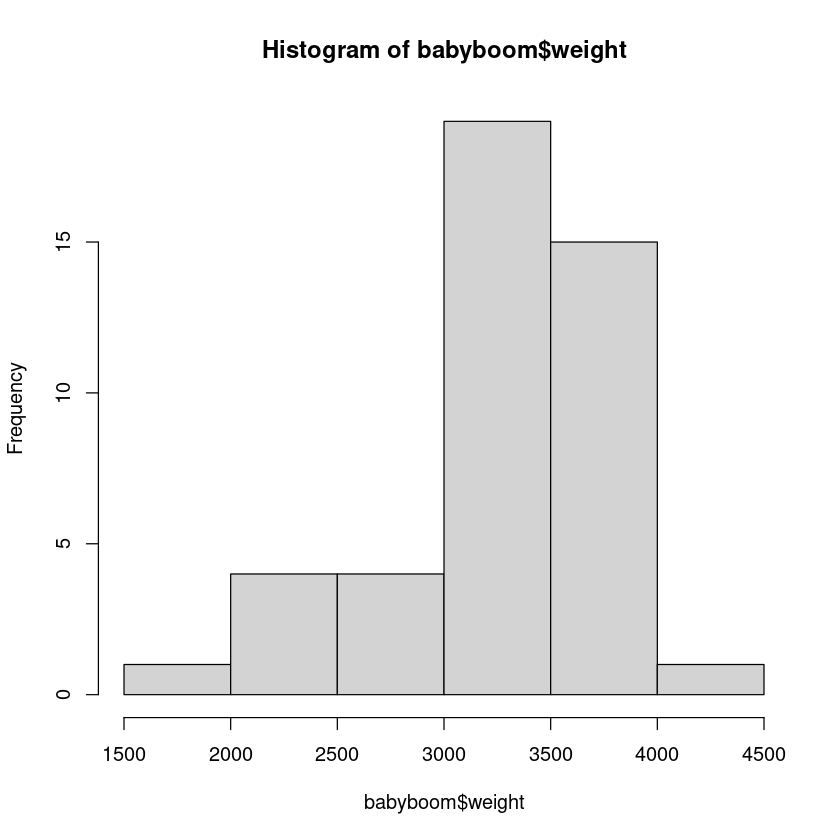

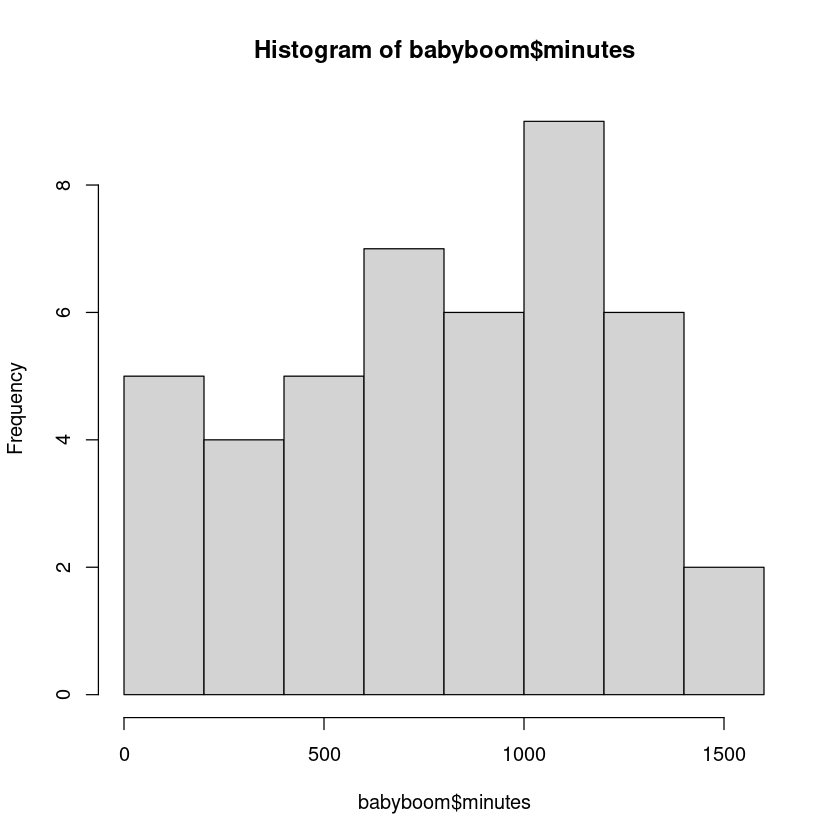

In [ ]:
hist(babyboom$weight)
hist(babyboom$minutes)

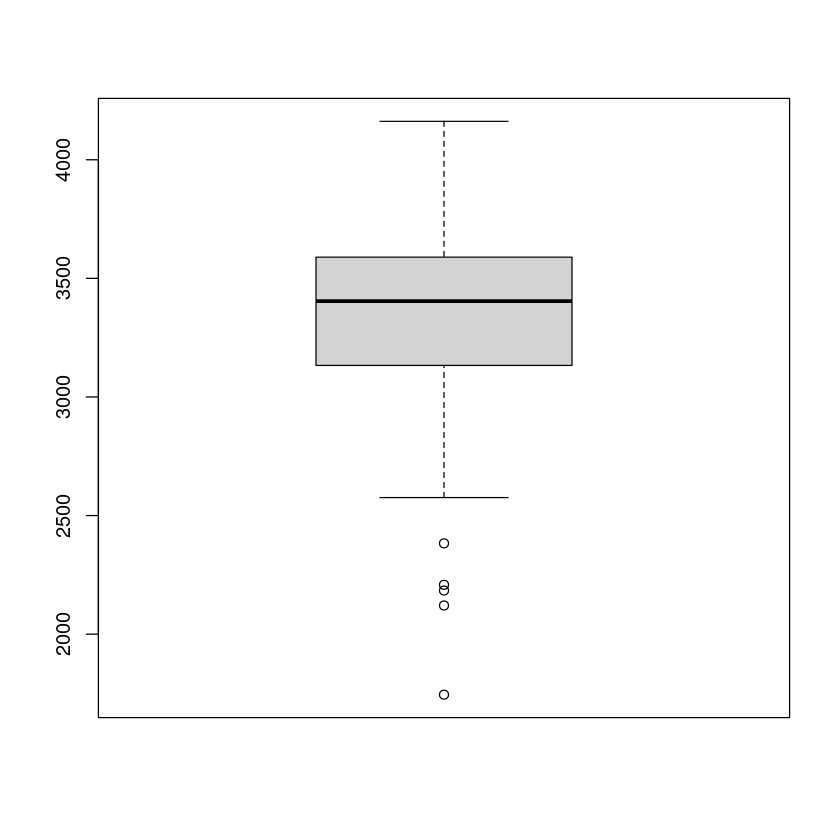

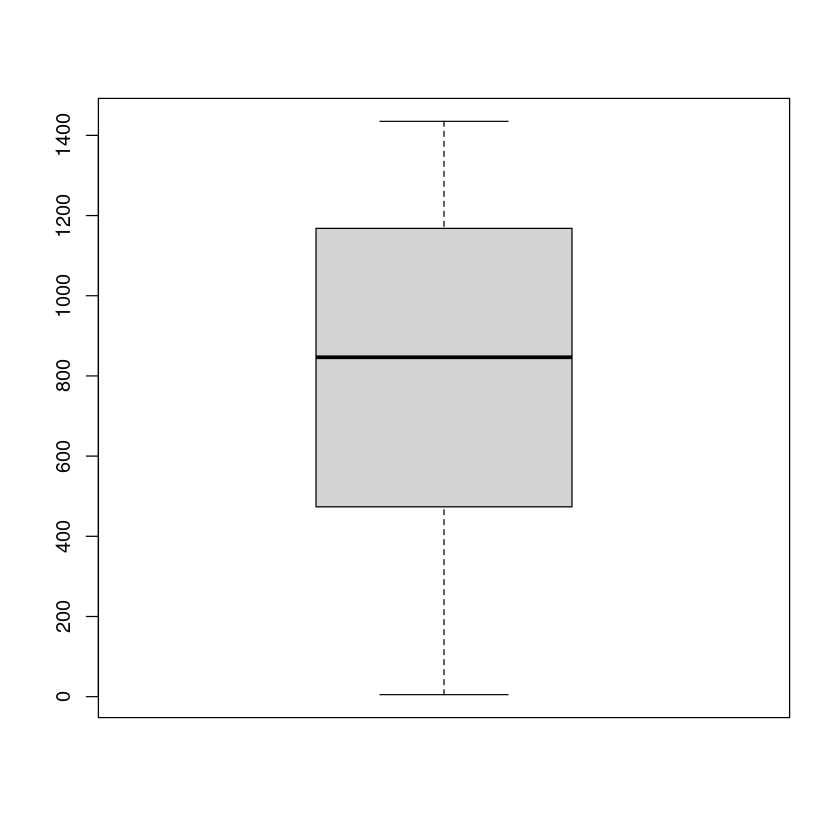

In [31]:
boxplot(babyboom$weight)
boxplot(babyboom$minutes)

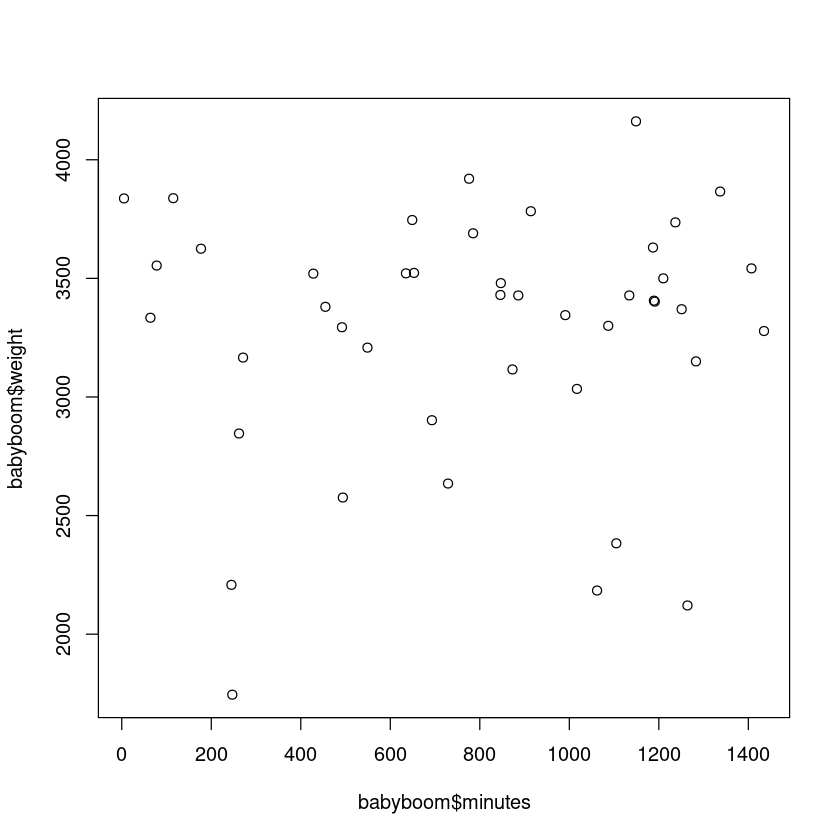

In [32]:
plot(babyboom$minutes, babyboom$weight)

## Plots from ggplots

### weight

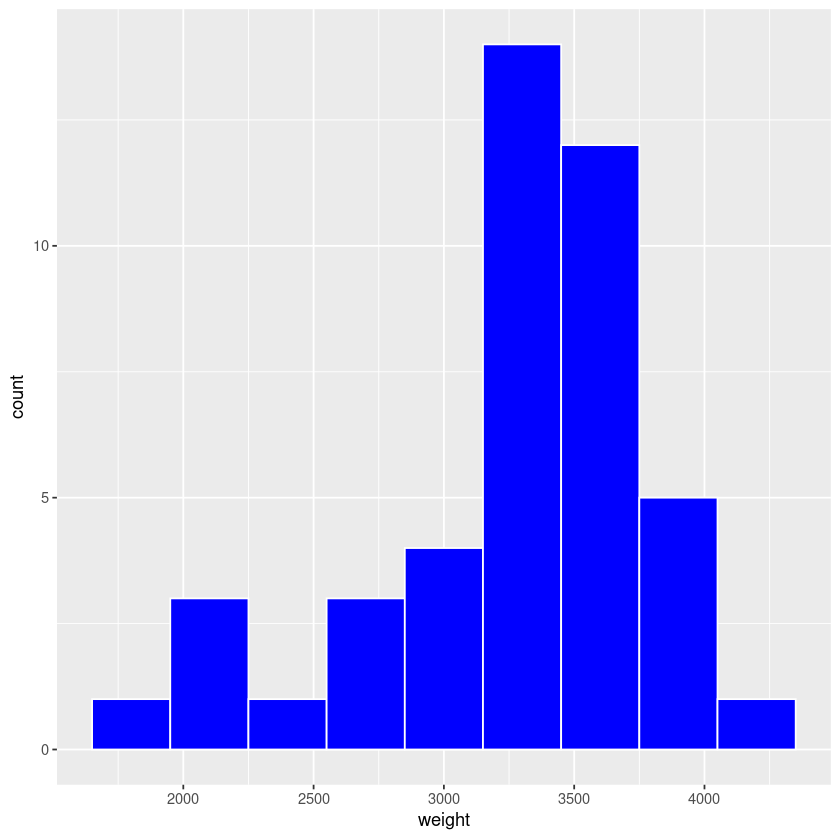

In [82]:
library(ggplot2)
ggplot(babyboom, aes(x = weight))+
    geom_histogram(fill = "blue", col = "white", binwidth = 300)

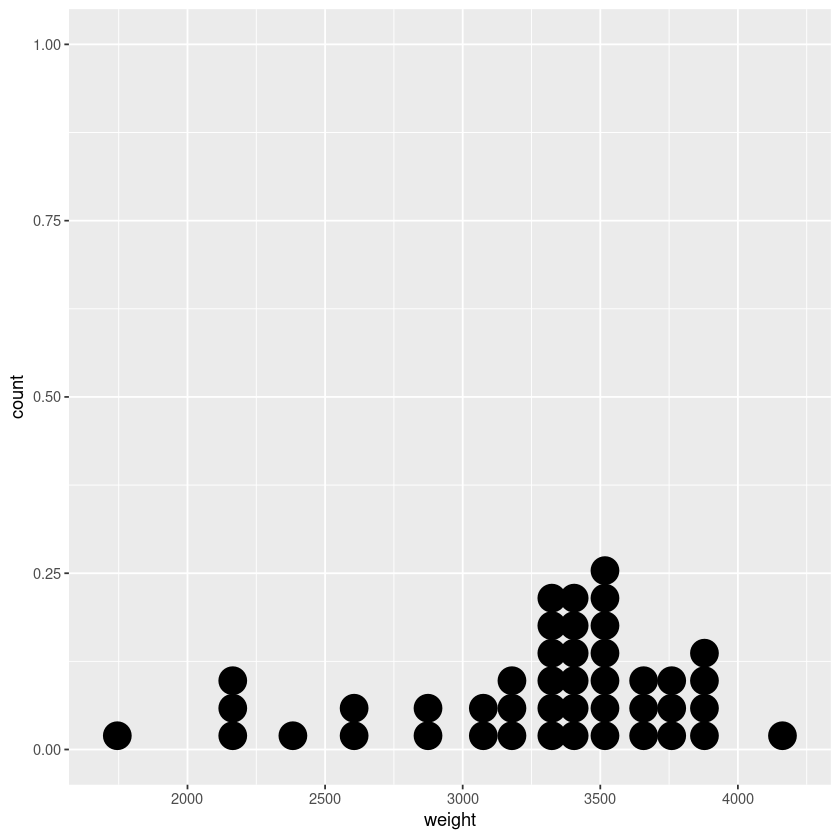

In [83]:
library(ggplot2)
ggplot(babyboom, aes(x = weight))+
    geom_dotplot(binwidth = 100)

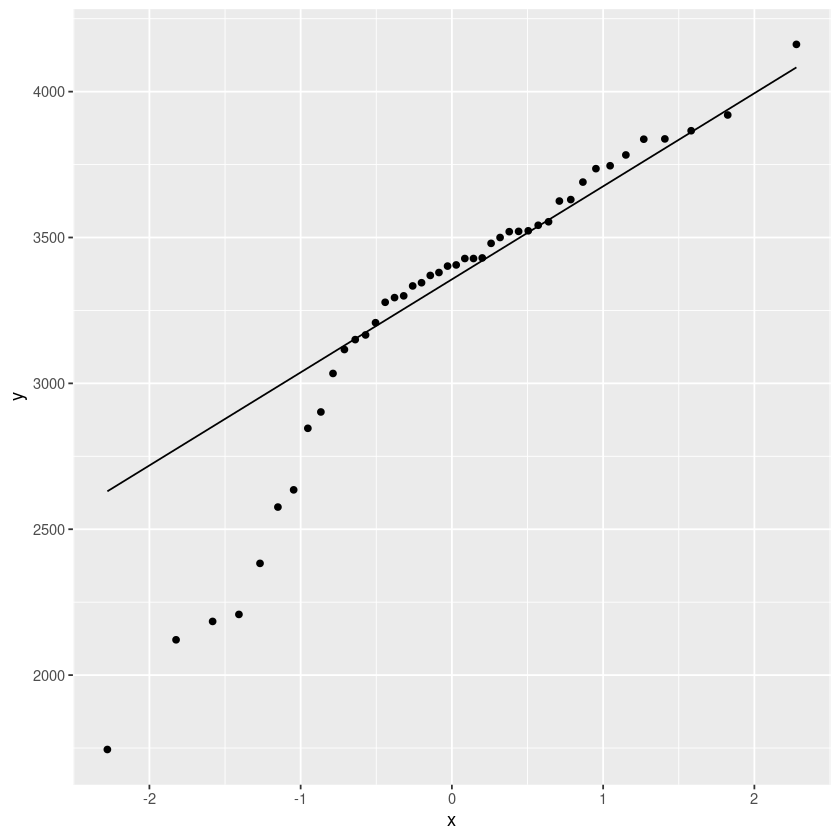

In [86]:
library(ggplot2)
ggplot(babyboom, aes(sample=weight))+
    stat_qq()+
    stat_qq_line() # norm


### minutes after midnight

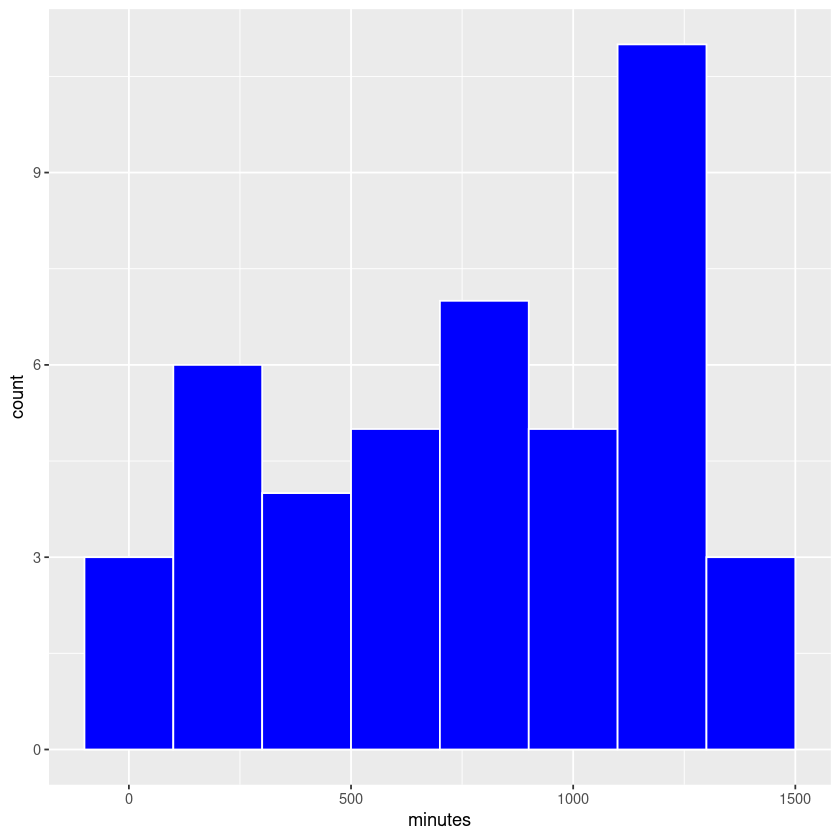

In [60]:
library(ggplot2)
ggplot(babyboom, aes(x = minutes))+
    geom_histogram(fill = "blue", col = "white", binwidth = 200)

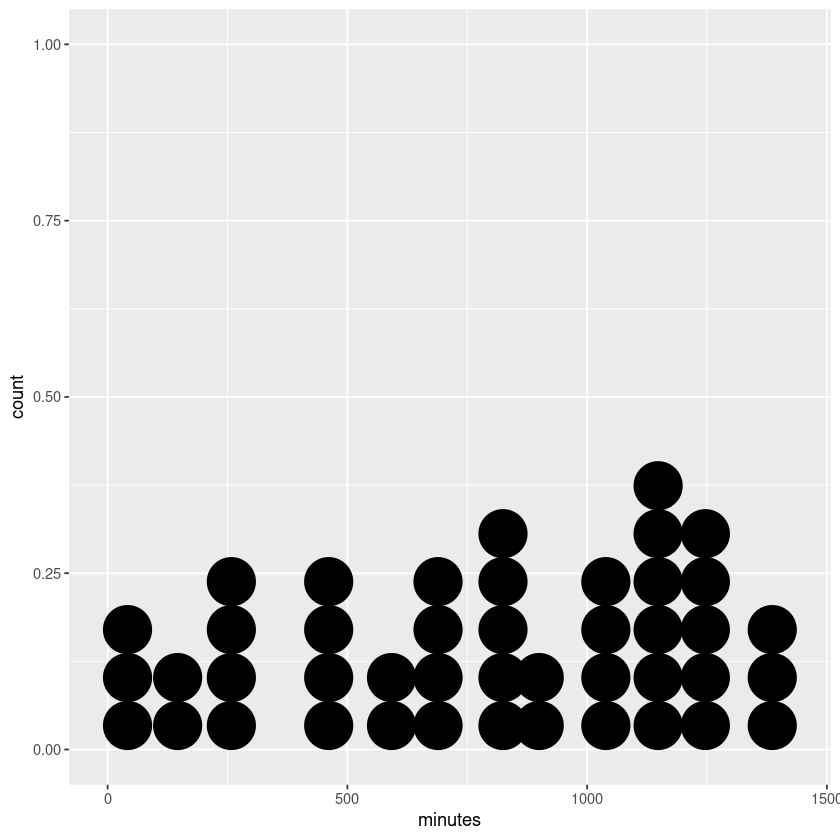

In [67]:
library(ggplot2)
ggplot(babyboom, aes(x = minutes))+
    geom_dotplot(binwidth = 100)

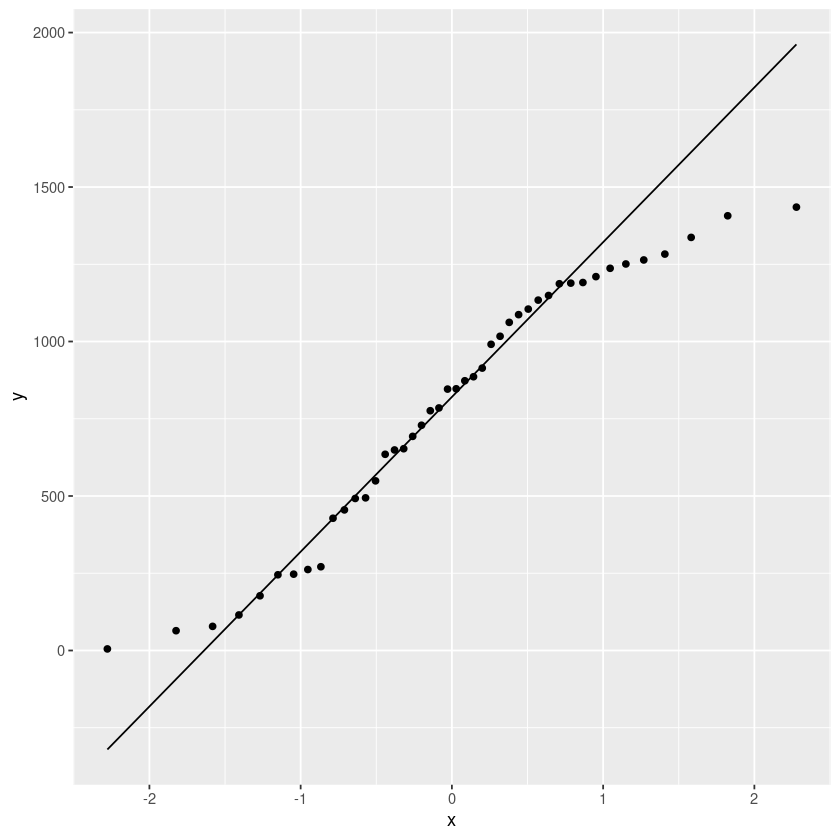

In [79]:
library(ggplot2)
ggplot(babyboom, aes(sample=minutes))+
    stat_qq()+
    stat_qq_line() # norm


## Separately samples Boys and Girls

### Density

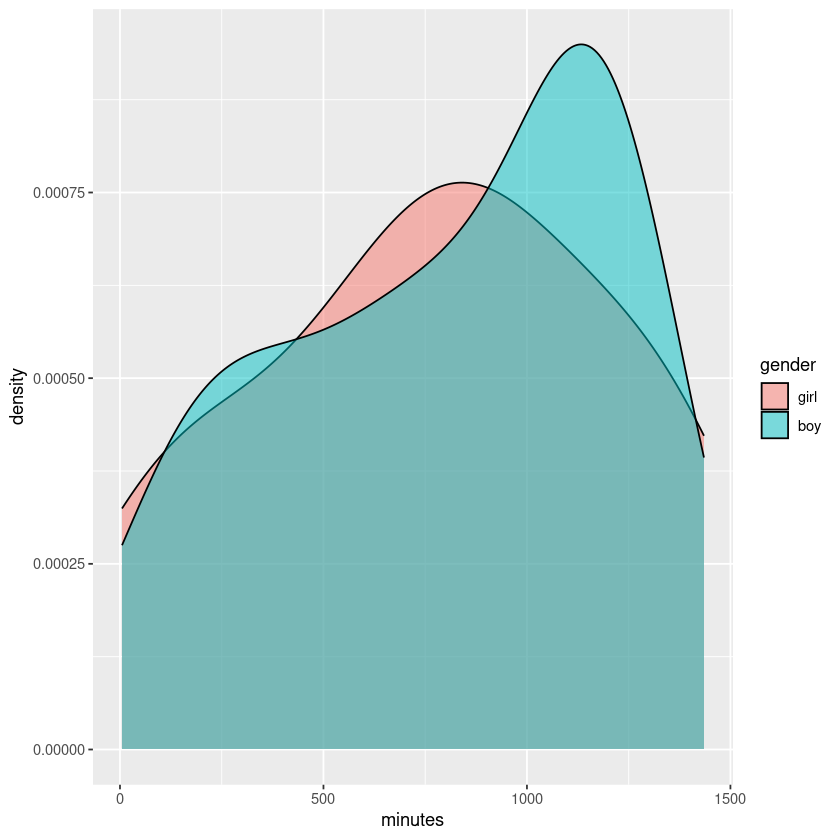

In [76]:
library(ggplot2)
ggplot(babyboom, aes(x = minutes, fill = gender))+
    geom_density( alpha = 0.5)

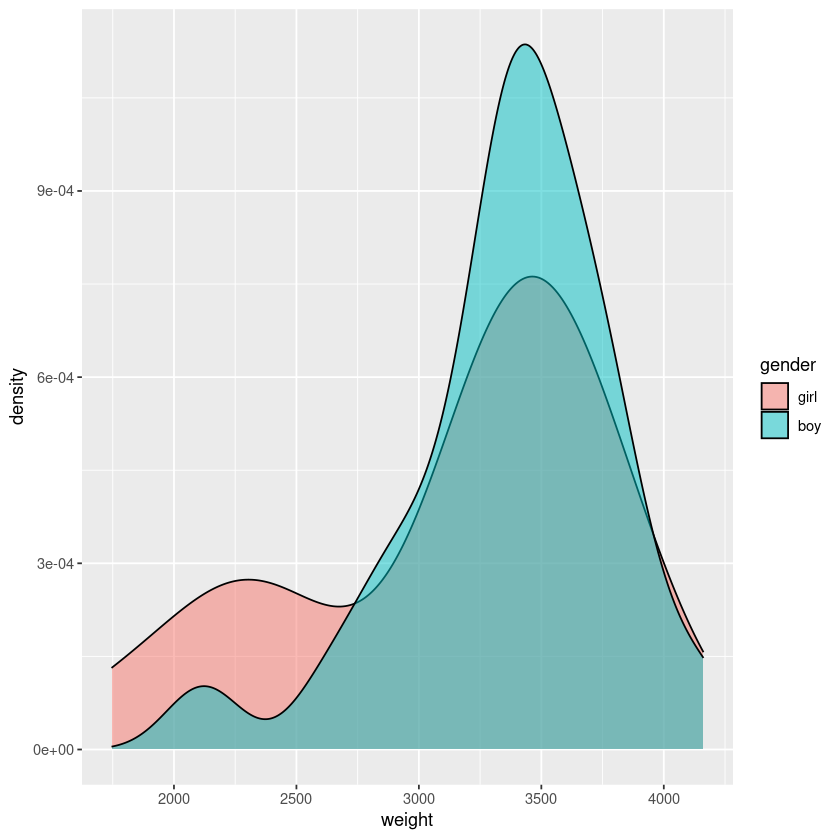

In [85]:
library(ggplot2)
ggplot(babyboom, aes(x = weight, fill = gender))+
    geom_density( alpha = 0.5)

### способ 1: поделить на subsets

In [90]:
babyboom_boys = subset(babyboom, gender == "boy")
head(babyboom_boys, 2)

babyboom_girls = subset(babyboom, gender == "girl")
head(babyboom_girls, 2)

,birth,gender,weight,minutes
,<int>,<fct>,<int>,<int>
3,118,boy,3554,78
4,155,boy,3838,115


,birth,gender,weight,minutes
,<int>,<fct>,<int>,<int>
1,5,girl,3837,5
2,104,girl,3334,64


In [ ]:
summary(babyboom_boys)
summary(babyboom_girls)

     birth         gender       weight        minutes      
 Min.   : 118.0   girl: 0   Min.   :2121   Min.   :  78.0  
 1st Qu.: 754.2   boy :26   1st Qu.:3198   1st Qu.: 464.2  
 Median :1409.5             Median :3404   Median : 849.5  
 Mean   :1311.9             Mean   :3375   Mean   : 799.6  
 3rd Qu.:1937.5             3rd Qu.:3629   3rd Qu.:1177.5  
 Max.   :2123.0             Max.   :4162   Max.   :1283.0  

     birth         gender       weight        minutes      
 Min.   :   5.0   girl:18   Min.   :1745   Min.   :   5.0  
 1st Qu.: 837.8   boy : 0   1st Qu.:2711   1st Qu.: 507.8  
 Median :1406.5             Median :3381   Median : 846.5  
 Mean   :1273.0             Mean   :3132   Mean   : 773.0  
 3rd Qu.:1804.2             3rd Qu.:3517   3rd Qu.:1094.2  
 Max.   :2355.0             Max.   :3866   Max.   :1435.0  

In [94]:
# или прям внутри функции

summary(subset(babyboom, gender=="boy"))

     birth         gender       weight        minutes      
 Min.   : 118.0   girl: 0   Min.   :2121   Min.   :  78.0  
 1st Qu.: 754.2   boy :26   1st Qu.:3198   1st Qu.: 464.2  
 Median :1409.5             Median :3404   Median : 849.5  
 Mean   :1311.9             Mean   :3375   Mean   : 799.6  
 3rd Qu.:1937.5             3rd Qu.:3629   3rd Qu.:1177.5  
 Max.   :2123.0             Max.   :4162   Max.   :1283.0  

### способ 2: писать условие в функцию в []

In [97]:
summary(babyboom$weight[babyboom$gender == "boy"])
sd(babyboom$weight[babyboom$gender == "boy"])
sd(x = babyboom_boys$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2121    3198    3404    3375    3629    4162 

[1] 428.0461

[1] 428.0461